In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
df = pd.read_csv("vgsales_cleaned_franchise_random.csv")
df.head(12)


,Rank,Name,Franchise,basename,Genre,Platform,Publisher,Developer,Year,Random_Values,Estimated_Sales
0,1,Wii Sports,Undefined Franchise,wii-sports,Sports,Wii,Nintendo,Nintendo EAD,2006.0,0.961891,82.86
1,2,Super Mario Bros.,Mario,super-mario-bros,Platform,NES,Nintendo,Nintendo EAD,1985.0,0.648642,40.24
2,3,Mario Kart Wii,Mario,mario-kart-wii,Racing,Wii,Nintendo,Nintendo EAD,2008.0,0.429207,37.14
3,4,PlayerUnknown's Battlegrounds,Undefined Franchise,playerunknowns-battlegrounds,Shooter,PC,PUBG Corporation,PUBG Corporation,2017.0,0.089494,36.60
4,5,Wii Sports Resort,Undefined Franchise,wii-sports-resort,Sports,Wii,Nintendo,Nintendo EAD,2009.0,0.056380,33.09
5,6,Pokemon Red / Green / Blue Version,Pokemon,pokmon-red,Role-Playing,GB,Nintendo,Game Freak,1998.0,0.969798,31.38
6,7,New Super Mario Bros.,Mario,new-super-mario-bros,Platform,DS,Nintendo,Nintendo EAD,2006.0,0.239771,30.80
7,8,Tetris,Tetris,tetris,Puzzle,GB,Nintendo,Bullet Proof Software,1989.0,0.288852,30.26
8,9,New Super Mario Bros. Wii,Mario,new-super-mario-bros-wii,Platform,Wii,Nintendo,Nintendo EAD,2009.0,0.502516,30.22
9,10,Minecraft,Minecraft,minecraft,Misc,PC,Mojang,Mojang AB,2010.0,0.818405,30.01


In [2]:
df.describe()

,Rank,Year,Random_Values,Estimated_Sales
count,21233.000000,21204.000000,21233.000000,21233.000000
mean,10617.481420,2007.705339,0.495747,0.496596
std,6130.286736,6.268907,0.287175,1.526599
min,1.000000,1970.000000,0.000022,0.000000
25%,5309.000000,2004.000000,0.248871,0.040000
50%,10617.000000,2008.000000,0.490631,0.140000
75%,15926.000000,2012.000000,0.745535,0.420000
max,21242.000000,2020.000000,0.999922,82.860000


In [3]:
df.columns

Index(['Rank', 'Name', 'Franchise', 'basename', 'Genre', 'Platform',
       'Publisher', 'Developer', 'Year', 'Random_Values', 'Estimated_Sales'],
      dtype='object')

C:\Users\issame\AppData\Local\Temp\ipykernel_8392\3933329586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True)


<Axes: >

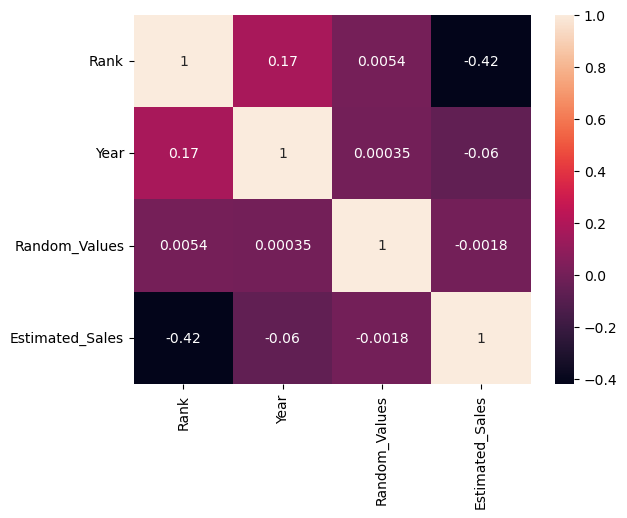

In [4]:
sns.heatmap(df.corr(), annot =True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21233 entries, 0 to 21232
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             21233 non-null  int64  
 1   Name             21233 non-null  object 
 2   Franchise        21233 non-null  object 
 3   basename         21233 non-null  object 
 4   Genre            21233 non-null  object 
 5   Platform         21233 non-null  object 
 6   Publisher        20652 non-null  object 
 7   Developer        20582 non-null  object 
 8   Year             21204 non-null  float64
 9   Random_Values    21233 non-null  float64
 10  Estimated_Sales  21233 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.8+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Rank                 0
Name                 0
Franchise            0
basename             0
Genre                0
Platform             0
Publisher          581
Developer          651
Year                29
Random_Values        0
Estimated_Sales      0
dtype: int64

In [8]:
df['Year'].dtype

dtype('float64')

In [9]:
df['Year'].unique()

array([2006., 1985., 2008., 2017., 2009., 1998., 1989., 2010., 2007.,
       2005., 2000., 1991., 2013., 2014., 2004., 2011., 1990., 2003.,
       2002., 2016., 2015., 2001., 1999., 2018., 2012., 1996., 1992.,
       1993., 1997., 1994., 1982., 1988., 1987., 1995., 1981., 1986.,
       1978., 1983., 2020., 1984., 1977., 2019., 1980., 1970., 1979.,
         nan])

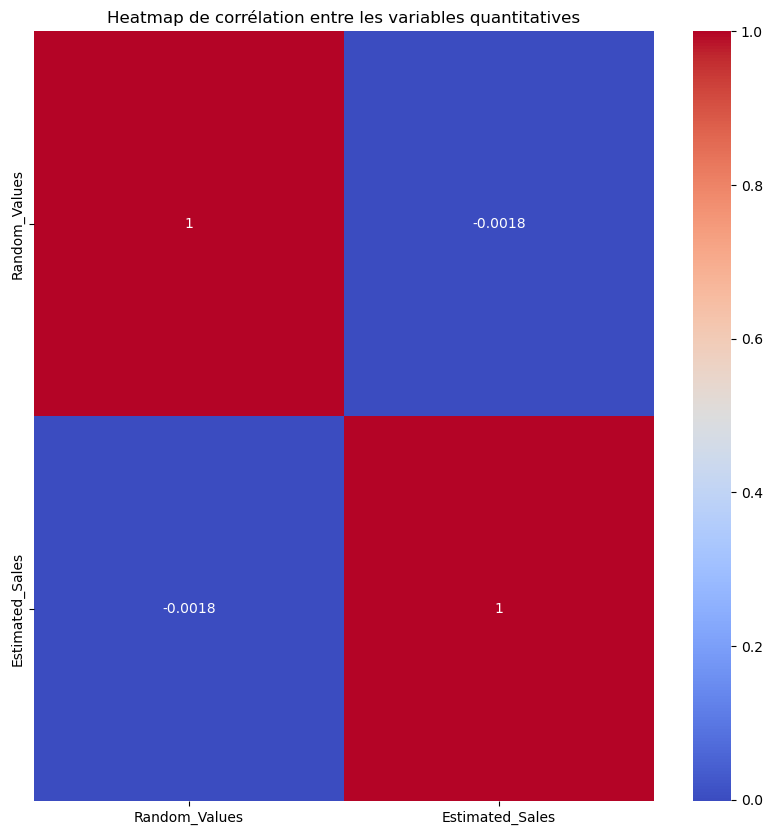

In [10]:
cor = df.iloc[:,9:18].corr() 
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(cor, annot = True, ax = ax, cmap = "coolwarm")
plt.title("Heatmap de corrélation entre les variables quantitatives")
plt.show()

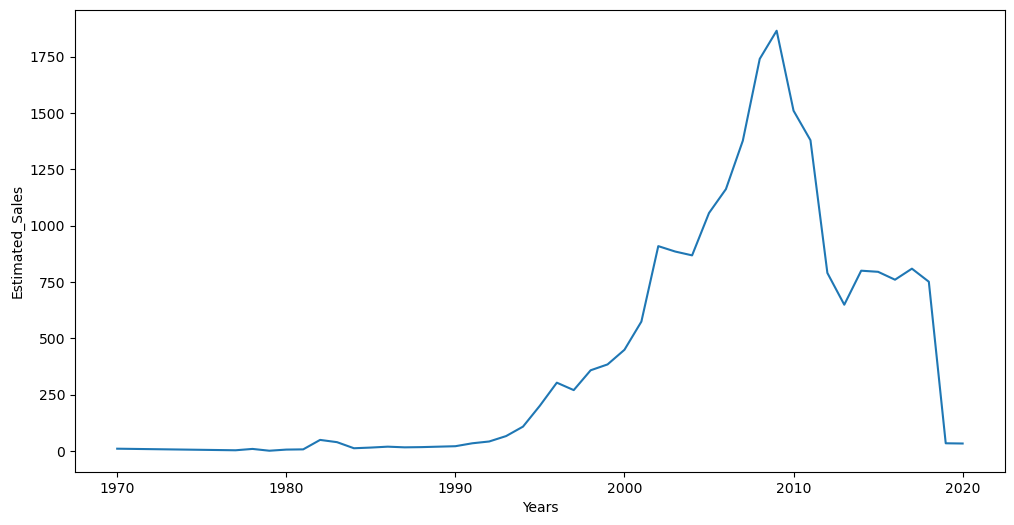

In [11]:
release_year = df['Year'].value_counts()
x_values = release_year.values
plt.figure(figsize=(12,6))
sns.lineplot(data = release_year)
plt.xlabel("Years")
plt.ylabel("Estimated_Sales");

In [12]:
df_Estimated_Sales = df.groupby(['Year']).agg({'Estimated_Sales': 'sum'})

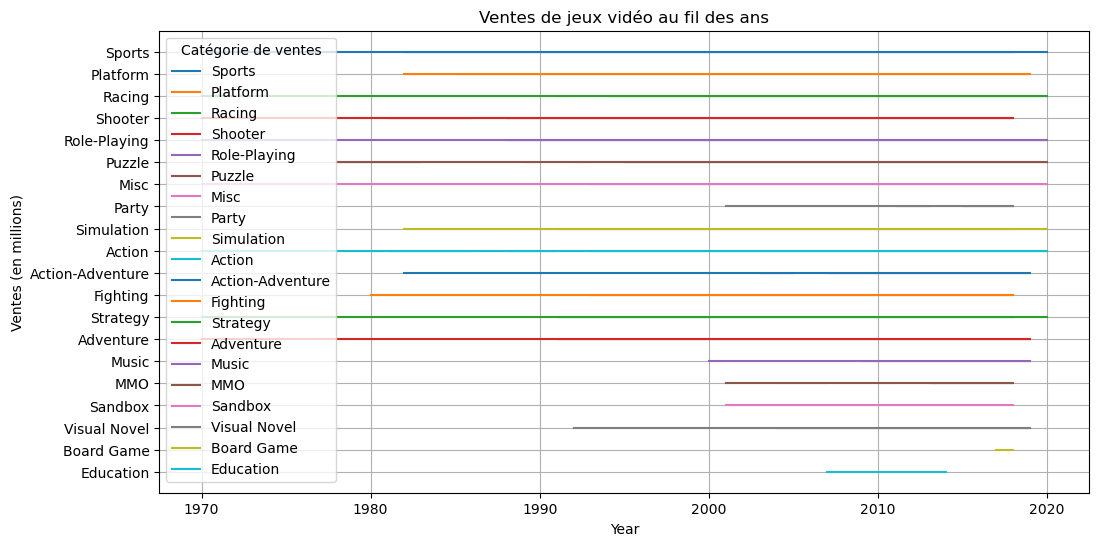

In [13]:
plt.figure(figsize=(12, 6))

# Line plot for different sales categories over time
sns.lineplot(data=df, x='Year', y='Genre', hue='Genre', palette='tab10')

plt.xlabel('Year')
plt.ylabel('Ventes (en millions)')
plt.title('Ventes de jeux vidéo au fil des ans')
plt.legend(title='Catégorie de ventes', loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Un graphique qui montre les ventes de jeux vidéo au fil des ans, en distinguant les différentes catégories de ventes par couleur.

In [14]:
df_Estimated_Sales.head(10)

,Estimated_Sales
Year,
1970.0,1.16
1977.0,2.50
1978.0,6.19
1979.0,0.31
1980.0,2.58
1981.0,10.49
1982.0,44.29
1983.0,25.92
1984.0,7.82


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


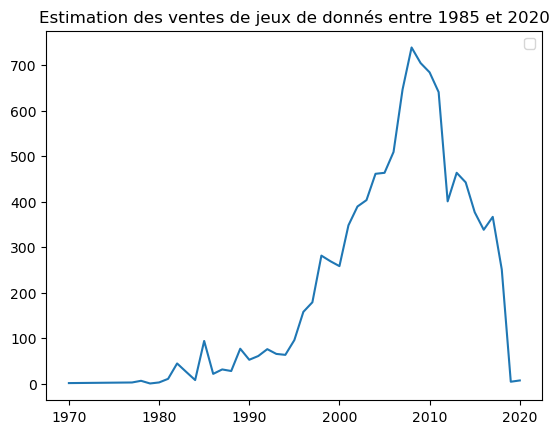

In [15]:
plt.plot(df_Estimated_Sales.index,df_Estimated_Sales.values)
plt.title('Estimation des ventes de jeux de donnés entre 1985 et 2020')
plt.legend();

In [ ]:
##je constate qu'Apartir de l'année 1992 une augmentation de la vente global des jeux de donnée et un pic de vente en 2008. 

In [16]:
df_Estimated_Sales.max()

Estimated_Sales    738.49
dtype: float64

In [17]:
df_Estimated_Sales.describe()

,Estimated_Sales
count,45.000000
mean,234.314000
std,230.341093
min,0.310000
25%,27.690000
50%,157.660000
75%,400.420000
max,738.490000


In [18]:
df['Year'].max()

2020.0

<Axes: >

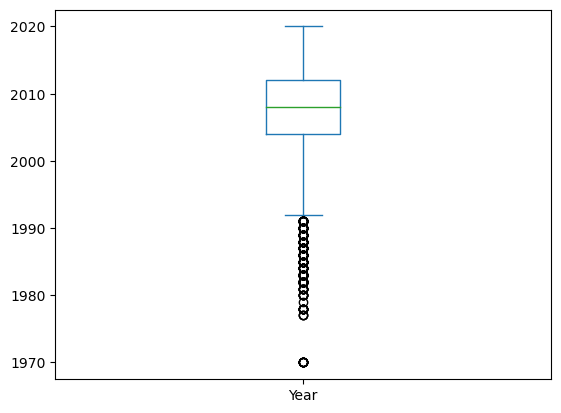

In [19]:
df['Year'].plot.box()

<Axes: ylabel='Frequency'>

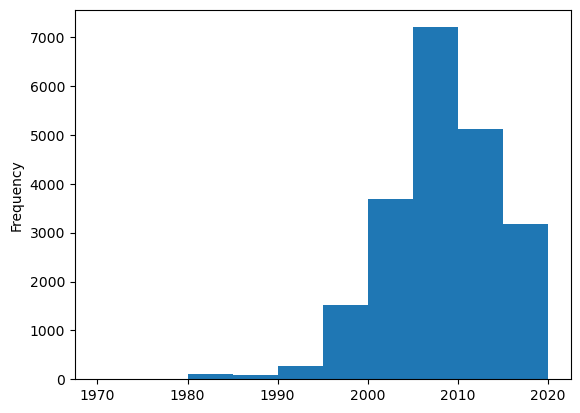

In [20]:
df['Year'].plot.hist()

In [21]:
df.tail()

,Rank,Name,Franchise,basename,Genre,Platform,Publisher,Developer,Year,Random_Values,Estimated_Sales
21228,21238,"Mind, Body & Soul: Blend It!",Undefined Franchise,"body & soul blend it""",Puzzle,DS,505 Games,Crush Digital,2010.0,0.008455,0.0
21229,21239,Ride! Carnival Tycoon,Undefined Franchise,ride-carnival-tycoon,Strategy,PC,ValuSoft,ValuSoft,2007.0,0.692902,0.0
21230,21240,Shinobido: Tales of the Ninja,Tales,shinobido-tales-of-the-ninja,Action,PSP,Sony Computer Entertainment,Acquire,2007.0,0.223675,0.0
21231,21241,Tactical Ops: Assault on Terror,Undefined Franchise,tactical-ops-assault-on-terror,Shooter,PC,Atari,Kamehan Studios,2002.0,0.822668,0.0
21232,21242,World in Conflict: Soviet Assault,Undefined Franchise,world-in-conflict-soviet-assault,Strategy,PC,Ubisoft,Massive Entertainment / Swordfish Studios,2009.0,0.532367,0.0


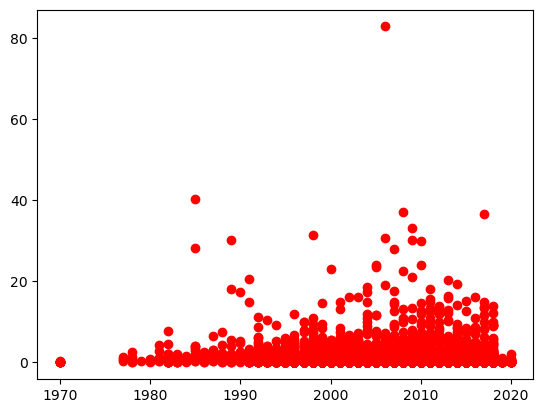

In [22]:
plt.scatter(df['Year'], df['Estimated_Sales'], color ='red')

In [ ]:
#À partir de 1992, il y a eu une augmentation de la vente globale des jeux de données, qui a atteint un pic en 2008.